In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d1 = pd.read_csv('../data/D1.csv', low_memory=False)

In [4]:
d1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,length_of_stay,...,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,single_day_admission
0,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,No
1,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,No,No,No,Steady,Ch,Yes,NO,No
2,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,Yes
3,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,No,No,No,No,Steady,No,Yes,>30,No
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,No,No,No,No,Steady,No,Yes,>30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50026,150712854,54487647,AfricanAmerican,Male,[60-70),?,2,1,1,8,...,No,No,No,No,No,Steady,Ch,Yes,>30,No
50027,150713208,99665856,Caucasian,Male,[70-80),?,2,1,1,1,...,No,No,No,No,No,No,No,No,NO,Yes
50028,150715134,46894068,Caucasian,Male,[60-70),?,2,1,1,5,...,No,No,No,No,No,No,No,No,NO,No
50029,150715788,86575536,Caucasian,Male,[70-80),?,1,3,1,5,...,No,No,No,Steady,No,No,No,Yes,<30,No


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              50031 non-null  int64 
 1   patient_nbr               50031 non-null  int64 
 2   race                      50031 non-null  object
 3   gender                    50031 non-null  object
 4   age                       50031 non-null  object
 5   weight                    50031 non-null  object
 6   admission_type_id         50031 non-null  int64 
 7   discharge_disposition_id  50031 non-null  int64 
 8   admission_source_id       50031 non-null  int64 
 9   length_of_stay            50031 non-null  int64 
 10  payer_code                50031 non-null  object
 11  medical_specialty         50031 non-null  object
 12  num_lab_procedures        50031 non-null  int64 
 13  num_procedures            50031 non-null  int64 
 14  num_medications       

#### Create a function to convert all object columns to 'string' type

In [6]:
def convert_object_to_string(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('string')
    return df


d1 = convert_object_to_string(d1)

In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              50031 non-null  int64 
 1   patient_nbr               50031 non-null  int64 
 2   race                      50031 non-null  string
 3   gender                    50031 non-null  string
 4   age                       50031 non-null  string
 5   weight                    50031 non-null  string
 6   admission_type_id         50031 non-null  int64 
 7   discharge_disposition_id  50031 non-null  int64 
 8   admission_source_id       50031 non-null  int64 
 9   length_of_stay            50031 non-null  int64 
 10  payer_code                50031 non-null  string
 11  medical_specialty         50031 non-null  string
 12  num_lab_procedures        50031 non-null  int64 
 13  num_procedures            50031 non-null  int64 
 14  num_medications       

In [8]:
d1.race.value_counts(dropna=False)

race
Caucasian          35732
AfricanAmerican    11149
?                   1257
Hispanic            1020
Other                610
Asian                263
Name: count, dtype: Int64

#### Replace the '?' values in the numeric columns with 'NaN'

In [37]:
d1['number_outpatient'] = d1['number_outpatient'].replace('?', np.nan).astype('Int64')
d1['number_emergency'] = d1['number_emergency'].replace('?', np.nan).astype('Int64')
d1['number_inpatient'] = d1['number_emergency'].replace('?', np.nan).astype('Int64')


In [38]:
# This code shows the patient_nbr with the highest number of encounters. This will be important for data handling at the modelling stage. 
d1.patient_nbr.value_counts(dropna=False)

patient_nbr
1660293     23
23643405    22
3401055     18
3481272     18
23199021    18
            ..
25023510     1
15082812     1
3282282      1
20331072     1
83582352     1
Name: count, Length: 38257, dtype: int64

In [39]:
# This is an example of a patient with multiple encounters in the dataset. Note that the number of encounters is not the same as the sum of the number_inpatient, number_outpatient, and number_emergency columns. You test this by running: 

# d1.loc[d1.patient_nbr == 1660293, ['number_inpatient', 'number_outpatient', 'number_emergency']].sum()
d1.loc[d1.patient_nbr == 1660293]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,length_of_stay,...,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,single_day_admission
269,2967810,1660293,Caucasian,Female,[60-70),?,6,25,7,10,...,No,No,No,No,No,Steady,No,Yes,>30,No
944,7216812,1660293,Caucasian,Female,[60-70),?,6,25,7,4,...,No,No,No,No,No,Steady,No,Yes,<30,No
1077,7977342,1660293,Caucasian,Female,[60-70),?,1,1,7,12,...,No,No,No,No,No,Down,Ch,Yes,<30,No
1349,9358128,1660293,Caucasian,Female,[60-70),?,1,1,7,8,...,No,No,No,No,No,Steady,No,Yes,>30,No
2954,18844260,1660293,Caucasian,Female,[60-70),?,1,1,7,3,...,No,No,No,No,No,Up,Ch,Yes,>30,No
3510,21616398,1660293,Caucasian,Female,[60-70),?,1,1,7,3,...,No,No,No,No,No,Down,Ch,Yes,>30,No
6780,33120744,1660293,Caucasian,Female,[60-70),?,2,1,1,9,...,No,No,No,No,No,Up,Ch,Yes,<30,No
7704,36030504,1660293,Caucasian,Female,[60-70),?,2,1,1,5,...,No,No,No,No,No,Steady,No,Yes,<30,No
8547,38486058,1660293,Caucasian,Female,[60-70),?,1,1,7,2,...,No,No,No,No,No,Up,Ch,Yes,<30,No
8972,39749172,1660293,Caucasian,Female,[60-70),?,2,1,1,4,...,No,No,No,No,No,Steady,No,Yes,>30,No


### Task 2 - Data exploration

- Make histograms of the numerical variables

<Axes: xlabel='num_lab_procedures', ylabel='Count'>

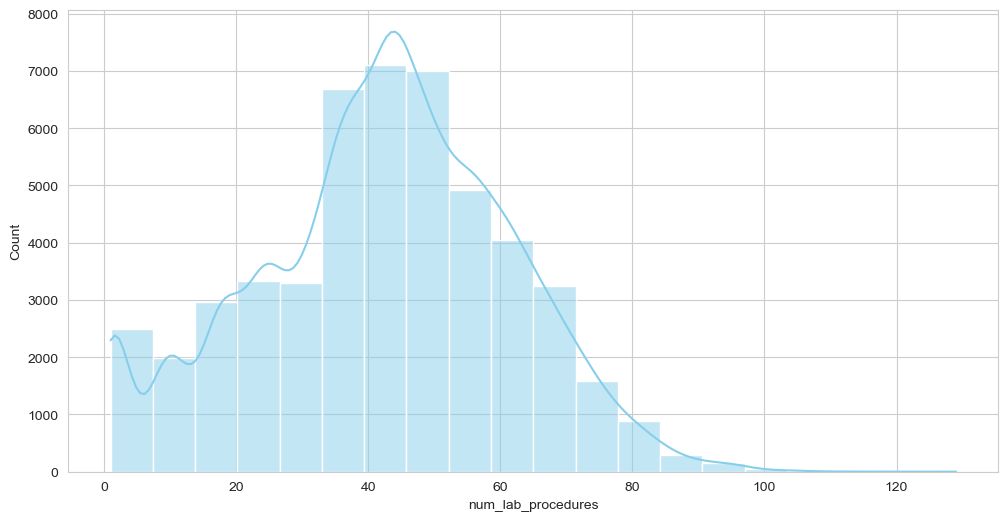

In [40]:
# make boxplots of the numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data=d1['num_lab_procedures'], kde=True, color='skyblue', bins=20)


Text(0.5, 0, 'some text')

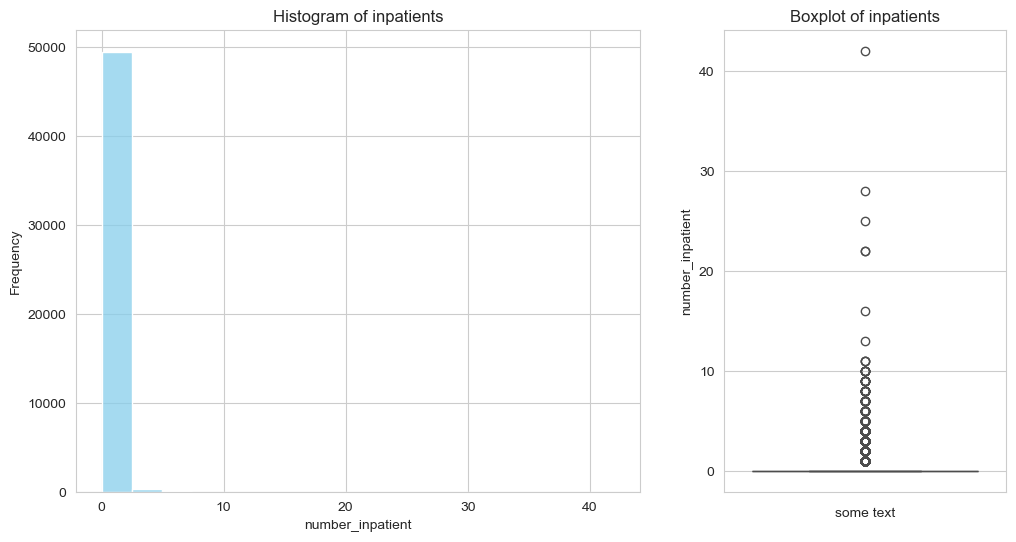

<Figure size 1200x600 with 0 Axes>

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})
plt.figure(figsize=(12, 6))
sns.histplot(data=d1['number_inpatient' ], ax=axes[0] ,color='skyblue')
axes[0].set_title(f'Histogram of inpatients')
axes[0].set_xlabel('number_inpatient')
axes[0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_inpatient'], ax=axes[1] ,color='orange')
axes[1].set_title(f'Boxplot of inpatients')
axes[1].set_xlabel('some text')


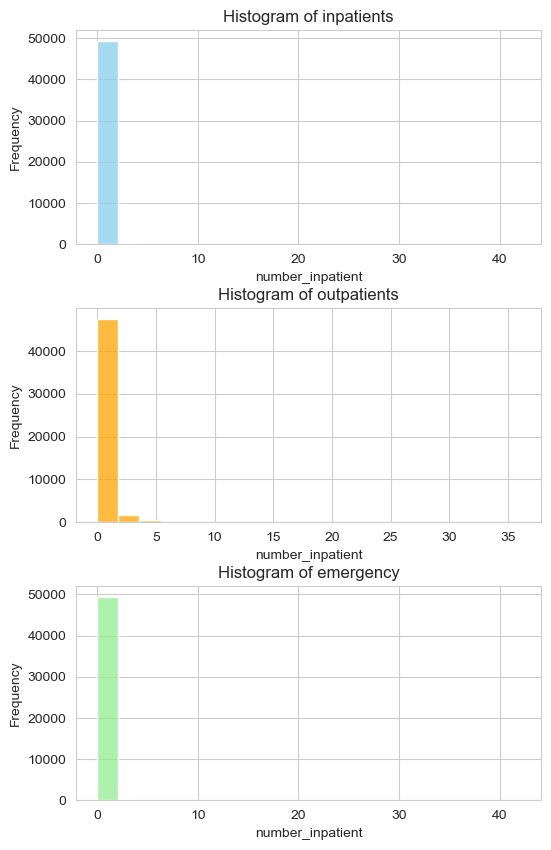

In [76]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

sns.histplot(data=d1['number_inpatient' ], ax=axes[0] ,bins = 20, color='skyblue')
axes[0].set_title(f'Histogram of inpatients')
axes[0].set_xlabel('number_inpatient')
axes[0].set_ylabel('Frequency')

sns.histplot(data=d1['number_outpatient' ], ax=axes[1] ,bins = 20, color='orange')
axes[1].set_title(f'Histogram of outpatients')
axes[1].set_xlabel('number_inpatient')
axes[1].set_ylabel('Frequency')

sns.histplot(data=d1['number_emergency' ], ax=axes[2] ,bins = 20,  color='lightgreen')
axes[2].set_title(f'Histogram of emergency')
axes[2].set_xlabel('number_inpatient')
axes[2].set_ylabel('Frequency')\
    
plt.subplots_adjust(hspace=0.3)

<Axes: >

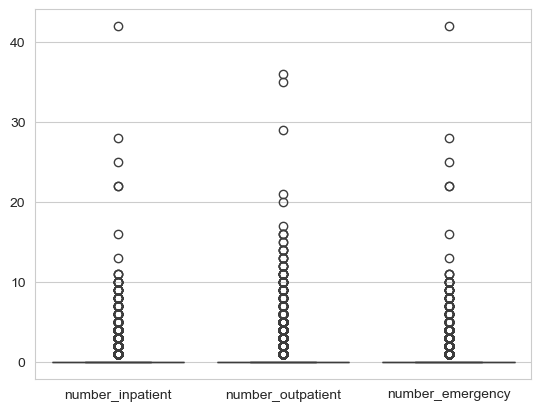

In [56]:
sns.boxplot(data=d1[['number_inpatient', 'number_outpatient', 'number_emergency']])

In [23]:
d1.age.value_counts(dropna=False)

age
[70-80)     13109
[60-70)     10874
[50-60)      8775
[80-90)      7530
[40-50)      5064
[30-40)      2053
[90-100)     1178
[20-30)       842
[10-20)       468
[0-10)        138
Name: count, dtype: Int64

In [278]:
d1_copy = d1.copy(deep=True)

In [279]:
age_categories = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)',
                  '[90-100)']

In [280]:
d1_copy['age'] = pd.Categorical(d1_copy['age'], categories=age_categories, ordered=True)

In [281]:
d1_copy['age'].value_counts(dropna=False).sort_index()

age
[0-10)        138
[10-20)       468
[20-30)       842
[30-40)      2053
[40-50)      5064
[50-60)      8775
[60-70)     10874
[70-80)     13109
[80-90)      7530
[90-100)     1178
Name: count, dtype: int64

In [282]:
weight_categories = ['?', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)',
                     '[175-200)', '>200']

In [283]:
d1_copy['weight'] = pd.Categorical(d1_copy['weight'], categories=weight_categories, ordered=True)

In [284]:
d1_copy['weight'].value_counts(dropna=False).sort_index()

weight
?            48169
[0-25)          37
[25-50)         68
[50-75)        550
[75-100)       794
[100-125)      316
[125-150)       73
[150-175)       17
[175-200)        6
>200             1
Name: count, dtype: int64

In [285]:
d1.number_emergency.value_counts(dropna=False)

number_emergency
0     46185
1      2629
2       644
3       232
4       132
?        69
5        45
6        27
7        24
8        16
9        10
10        8
11        3
22        2
25        1
13        1
42        1
16        1
28        1
Name: count, dtype: int64

Make a copy of the original dataframe to correct the mismatched variables

Fix up the mismatched data

In [6]:
d1[['number_outpatient', 'number_emergency', 'number_inpatient']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_outpatient  50011 non-null  Int64
 1   number_emergency   49962 non-null  Int64
 2   number_inpatient   49962 non-null  Int64
dtypes: Int64(3)
memory usage: 1.3 MB


### Skewness of integer variables

In [288]:
d1_copy[['number_outpatient', 'number_emergency', 'number_inpatient']].skew()

number_outpatient    9.314813
number_emergency     16.58132
number_inpatient     16.58132
dtype: Float64

In [289]:
d1_copy['number_inpatient'].value_counts(normalize=True, dropna=False) * 100

number_inpatient
0       92.312766
1        5.254742
2        1.287202
3        0.463712
4        0.263836
<NA>     0.137914
5        0.089944
6        0.053967
7         0.04797
8         0.03198
9        0.019988
10        0.01599
11       0.005996
22       0.003998
25       0.001999
13       0.001999
42       0.001999
16       0.001999
28       0.001999
Name: proportion, dtype: Float64

In [290]:
d1_copy['number_diagnoses'].value_counts(normalize=True, dropna=False) * 100

number_diagnoses
9    35.491995
5    16.521757
6    11.938598
7    11.480882
8    11.414923
4     7.345446
3     3.931562
2     1.535048
1     0.339789
Name: proportion, dtype: float64

In [291]:
d1_copy['num_lab_procedures'].value_counts(normalize=True, dropna=False) * 100

num_lab_procedures
43     2.960165
1      2.648358
44     2.602387
45     2.398513
46     2.260598
         ...   
129    0.001999
107    0.001999
108    0.001999
109    0.001999
120    0.001999
Name: proportion, Length: 114, dtype: float64

In [292]:
d1_copy['num_medications'].value_counts(normalize=True, dropna=False).sort_index()

num_medications
1     0.003198
2     0.005477
3     0.010593
4     0.017229
5     0.023206
        ...   
69    0.000080
70    0.000040
75    0.000020
79    0.000020
81    0.000020
Name: proportion, Length: 73, dtype: float64

In [293]:
# cut the num_medications variable into bins with labesl [0 - 10), [10 - 20), [20 - 30), [30 - 40), [>40))
pd.cut(d1_copy['num_medications'], bins=[0, 10, 20, np.inf], labels=['[0-10)', '[10-20)', '[>30)']).value_counts(
    normalize=True, dropna=False).sort_index() * 100

num_medications
[0-10)     29.243869
[10-20)    50.672583
[>30)      20.083548
Name: proportion, dtype: float64

<Axes: xlabel='number_inpatient', ylabel='Count'>

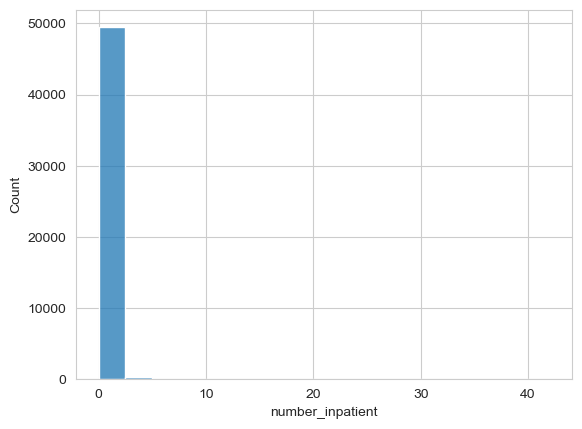

In [294]:
# make a frequency histogram of the number_outpatient variable using seaborn
sns.histplot(d1_copy['number_inpatient'])


In [295]:
len(np.unique(d1[['patient_nbr']]))

38257

In [296]:
len(d1)

50031

In [297]:
import seaborn as sns

### Task 2 - EDA

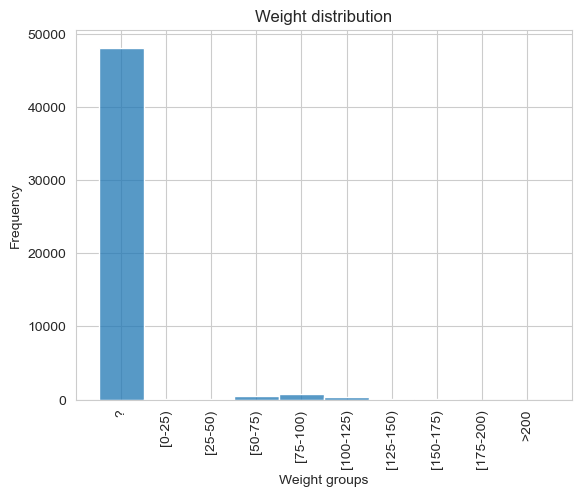

In [298]:
sns.histplot(d1_copy['weight'])
plt.title('Weight distribution')
plt.xlabel('Weight groups')
plt.ylabel('Frequency')

plt.xticks(rotation=90);


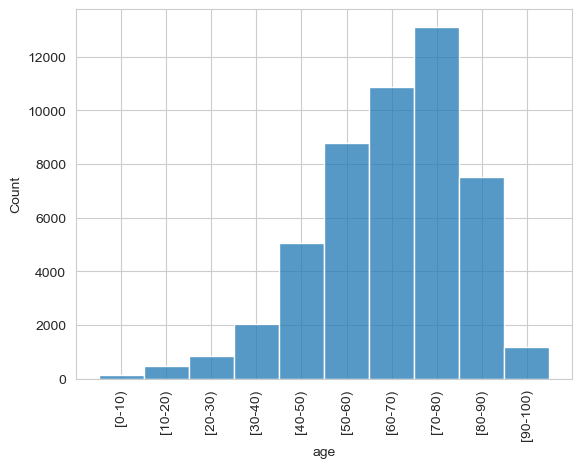

In [299]:
sns.histplot(d1_copy['age'])
plt.xticks(rotation=90);

<Axes: xlabel='payer_code', ylabel='Count'>

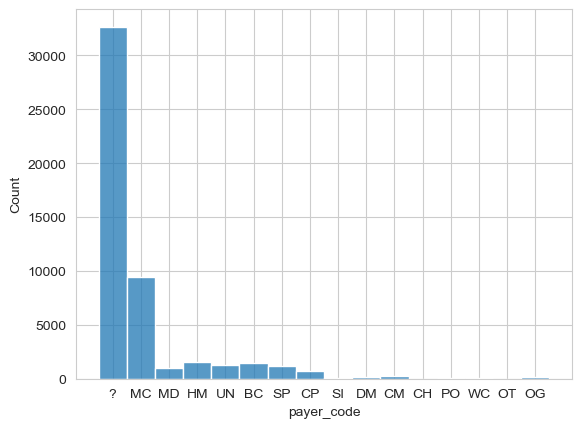

In [300]:
sns.histplot(d1_copy['payer_code'], bins=6)

<Axes: xlabel='weight', ylabel='Count'>

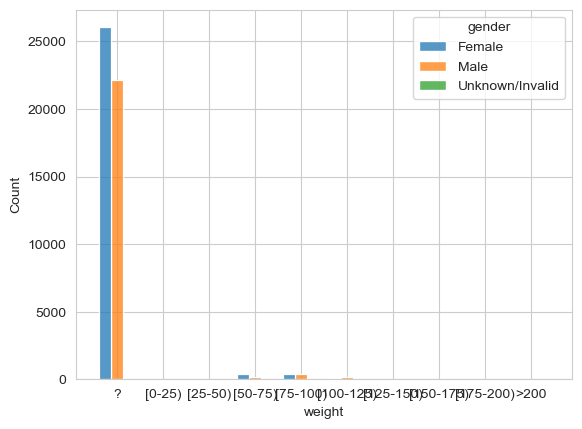

In [301]:
sns.histplot(data=d1_copy, x='weight', hue='gender', multiple='dodge', shrink=0.8)

In [306]:
def categorize_diagnosis(code):
    code_str = str(code)

    # Check for specific prefixes 'V' and 'E'
    if 'V' in code_str or 'E' in code_str:
        return 'other'

    # Convert the code to a numeric value
    try:
        code_num = int(float(code_str))
    except ValueError:
        return 'other'

    # Categorize based on the numeric value
    if 390 <= code_num < 460:
        return 'circulatory'
    elif 460 <= code_num < 520:
        return 'respiratory'
    elif 520 <= code_num < 580:
        return 'digestive'
    elif code_num == 250:
        return 'diabetes'
    elif 800 <= code_num < 1000:
        return 'injury'
    elif 710 <= code_num < 740:
        return 'musculoskeletal'
    elif 580 <= code_num < 630:
        return 'genitourinary'
    elif 140 <= code_num < 240:
        return 'neoplasms'
    elif 630 <= code_num < 680:
        return 'pregnancy'
    else:
        return 'other'


# Apply the function to the 'diag_1' column in the DataFrame
d1_copy['diag1_cats'] = d1_copy['diag_1'].apply(categorize_diagnosis)



In [307]:
d1_copy['diag1_cats'].value_counts()

diag1_cats
circulatory        16087
other               8295
respiratory         6796
diabetes            4558
digestive           4506
injury              3205
musculoskeletal     2419
genitourinary       2129
neoplasms           1702
pregnancy            334
Name: count, dtype: int64

In [308]:
categories = [
    (range(1, 139), 'infectious and parasitic diseases'),
    (range(140, 239), 'neoplasms'),
    (range(240, 279), 'endocrine, nutritional and metabolic diseases, and immunity disorders'),
    (range(280, 289), 'diseases of the blood and blood-forming organs'),
    (range(290, 319), 'mental disorders'),
    (range(320, 389), 'diseases of the nervous system and sense organs'),
    (range(390, 459), 'diseases of the circulatory system'),
    (range(460, 519), 'diseases of the respiratory system'),
    (range(520, 579), 'diseases of the digestive system'),
    (range(580, 629), 'diseases of the genitourinary system'),
    (range(630, 679), 'complications of pregnancy, childbirth, and the puerperium'),
    (range(680, 709), 'diseases of the skin and subcutaneous tissue'),
    (range(710, 739), 'diseases of the musculoskeletal system and connective tissue'),
    (range(740, 759), 'congenital anomalies'),
    (range(760, 779), 'certain conditions originating in the perinatal period'),
    (range(780, 799), 'symptoms, signs, and ill-defined conditions'),
    (range(800, 999), 'injury and poisoning')
]

In [321]:
def diagnosis_categories(code):
    if not isinstance(code, str):
        return
    if 'V' in code or 'E' in code:
        return 'Supplementary'
    if code == 'Unknown' or code == '?':
        return 'Unknown'

    code = float(code)
    for code_range, description in categories:
        if code in code_range:
            return description
        else:
            return 'Unknown'

In [323]:
d1_copy['diag_1'].apply(diagnosis_categories)

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
50026    Unknown
50027    Unknown
50028    Unknown
50029    Unknown
50030    Unknown
Name: diag_1, Length: 50031, dtype: object

In [ ]:
d1